# Introduction: Spotify Song Genre Classification

## Problem Description:
Music is a universal language that transcends boundaries. It comes in various genres, each with its unique characteristics and features. The ability to accurately classify music by genre is a challenging yet exciting task. This project tackles this problem by using machine learning algorithms to learn from a dataset of songs with known genres.

# Data description
The data is provided by [Spotify](https://www.kaggle.com/datasets/thedevastator/spotify-tracks-genre-dataset/data)

## Data Exploration & pre-processing: 
The notebook begins with a thorough exploration of the dataset, identifying key features and potential challenges. It covers data cleaning, handling missing values, and encoding categorical variables to prepare the data for model training.



## Baseline columns
| Column Name       | Description                                                                                                      | Data Type  |
|-------------------|------------------------------------------------------------------------------------------------------------------|------------|
| artists           | The name(s) of the artist(s) associated with the track.                                                           | String     |
| album_name        | The name of the album that the track belongs to.                                                                  | String     |
| track_name        | The name of the track.                                                                                            | String     |
| track_genre       | The genre of the track.                                                                                           | String     |
| popularity        | The popularity score of the track on Spotify, ranging from 0 to 100.                                              | Integer    |
| duration_ms       | The duration of the track in milliseconds.                                                                        | Integer    |
| explicit          | A boolean value indicating whether the track contains explicit content.                                           | Boolean    |
| danceability      | A score ranging from 0 to 1 that represents how suitable a track is for dancing based on various musical elements.| Float      |
| energy            | A measure of the intensity and activity of a track, ranging from 0 to 1.                                          | Float      |
| key               | The key of the track represented by an integer value.                                                             | Integer    |
| loudness          | The loudness of the track in decibels (dB).                                                                       | Float      |
| mode              | The tonal mode of the track, represented by an integer value (0 for minor, 1 for major).                          | Integer    |
| speechiness       | A score ranging from 0 to 1 that represents the presence of spoken words in a track.                              | Float      |
| acousticness      | A score ranging from 0 to 1 that represents the extent to which a track possesses an acoustic quality.            | Float      |
| instrumentalness  | A score ranging from 0 to 1 that represents the likelihood of a track being instrumental.                         | Float      |
| liveness          | A score ranging from 0 to 1 that represents the presence of an audience during the recording or performance.      | Float      |
| valence           | A score ranging from 0 to 1 that represents the musical positiveness conveyed by a track.                         | Float      |
| tempo             | The tempo of the track in beats per minute (BPM).                                                                 | Float      |
| time_signature    | The number of beats within each bar of the track.                                                                 | Integer    |


In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [213]:
df = pd.read_csv('./data/spotify-data.csv')

# Dropping unnecessary columns
df.drop(['0', 'track_id', 'key', 'duration_ms', 'time_signature'], axis=1, inplace=True)

# There is 1 value that is NA and is just annoying to figure out which row it is. So just drop it.
# TODO: Get back to this.
# print("shape", df.shape)
df.dropna(inplace=True)
# print("shape", df.shape)

# Artists column is a string with artists with ';' splitting them. 
# Making it an array of artists for easier processing.
df['artists'] = df['artists'].apply(lambda x: x.split(';'))

# For sake of this Notebook, we are only going to look at 10 randomly choosen genres.
genres = ['pop', 'salsa', 'club', 'disco', 'children', 'funk', 'rock', 'soul', 'turkish', 'sleep']
df = df[df.track_genre.isin(genres)]


## Exploratory Data Analysis (EDA): 
Here we will provide insights into the distribution of key variables, relationships between features, and an understanding of the data patterns. Visualizations aid in uncovering trends that contribute to the decision-making process.

Feature Engineering: The notebook implements feature engineering techniques to enhance the predictive power of the model. This involves creating new features, transforming existing ones, and selecting relevant variables to improve the model's ability to capture underlying patterns.

Model Selection: Multiple machine learning algorithms are explored for Spotify Genre prediction, including but not limited to ?? 
logistic regression, decision trees, random forests, and support vector machines. The notebook includes a comparative analysis of their performance metrics, helping users choose the most suitable model for their specific use case.

Model Training and Evaluation: The selected model is trained on the preprocessed dataset, and its performance is evaluated using various metrics such as accuracy, precision, recall, and F1 score. The notebook emphasizes the importance of choosing an evaluation metric that aligns with the business goals of the loan approval system.

Hyperparameter Tuning: To optimize the model's performance, the notebook incorporates hyperparameter tuning techniques, fine-tuning the model for better accuracy and robustness.

Deployment Considerations: The notebook concludes with a discussion on deploying the trained model into a production environment. It provides insights into model deployment options, considerations for scalability, and integration with existing loan approval systems.

By leveraging this Python notebook, users can seamlessly integrate an automated loan approval prediction model into their financial systems, significantly enhancing efficiency and reducing the time and resources required for manual decision-making.


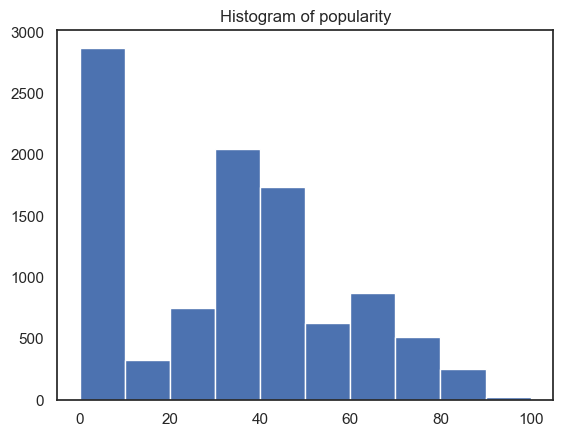

count    10000.000000
mean        32.443600
std         24.807744
min          0.000000
25%          1.000000
50%         34.000000
75%         47.000000
max        100.000000
Name: popularity, dtype: float64


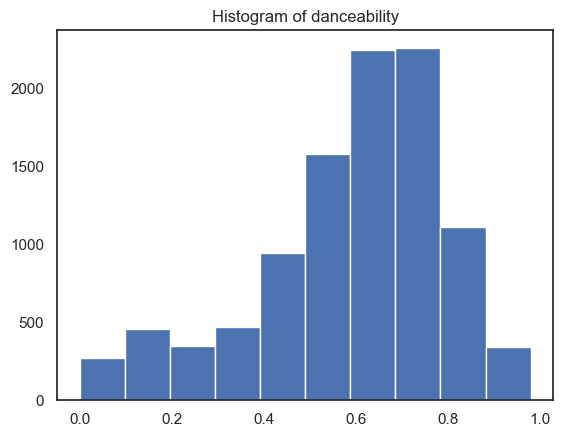

count    10000.000000
mean         0.590115
std          0.204318
min          0.000000
25%          0.492000
50%          0.630000
75%          0.732000
max          0.979000
Name: danceability, dtype: float64


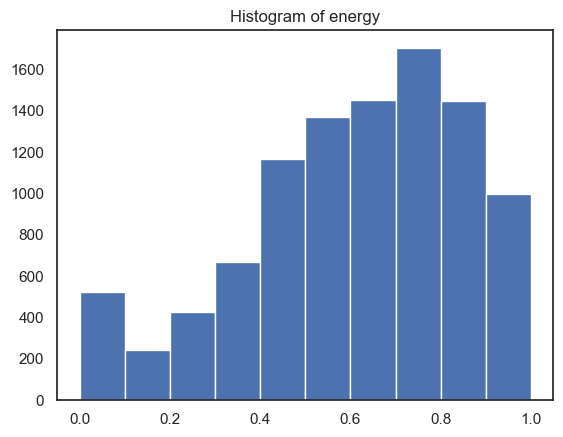

count    10000.000000
mean         0.608272
std          0.244613
min          0.000000
25%          0.459000
50%          0.645500
75%          0.796000
max          1.000000
Name: energy, dtype: float64


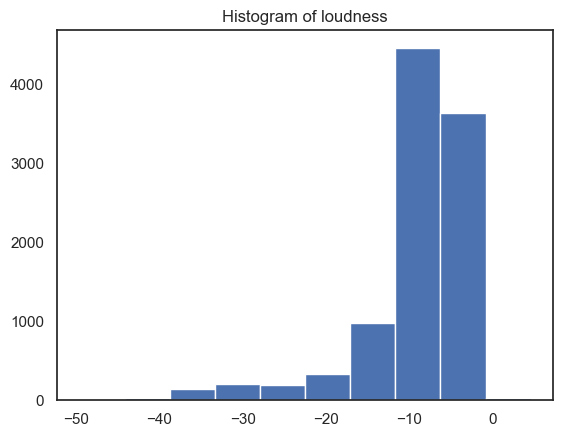

count    10000.000000
mean        -9.147744
std          6.462095
min        -49.531000
25%        -10.273000
50%         -7.374000
75%         -5.417000
max          4.532000
Name: loudness, dtype: float64


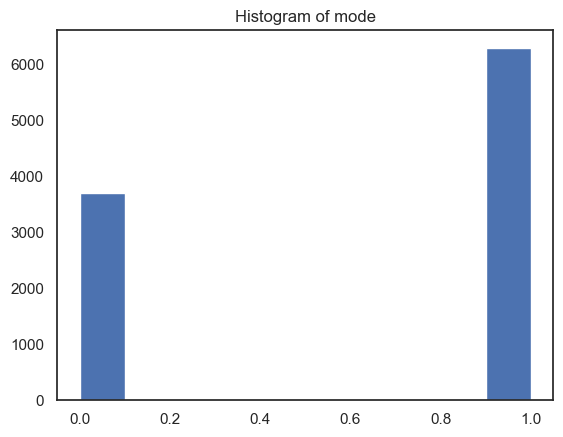

count    10000.00000
mean         0.62940
std          0.48299
min          0.00000
25%          0.00000
50%          1.00000
75%          1.00000
max          1.00000
Name: mode, dtype: float64


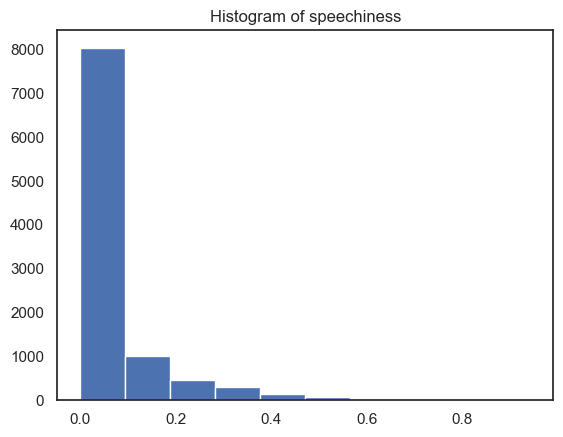

count    10000.000000
mean         0.080596
std          0.092375
min          0.000000
25%          0.035600
50%          0.046700
75%          0.076200
max          0.943000
Name: speechiness, dtype: float64


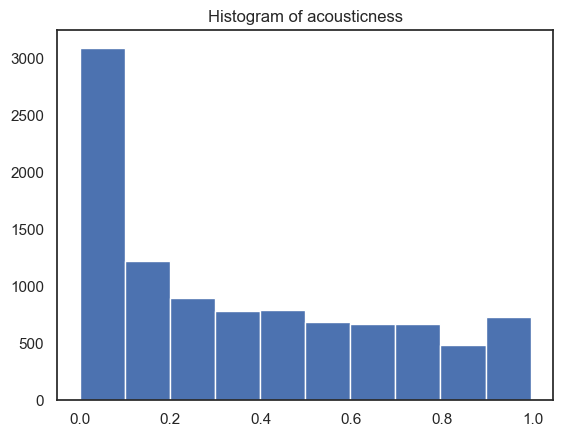

count    10000.000000
mean         0.352606
std          0.310211
min          0.000000
25%          0.063000
50%          0.277000
75%          0.603000
max          0.996000
Name: acousticness, dtype: float64


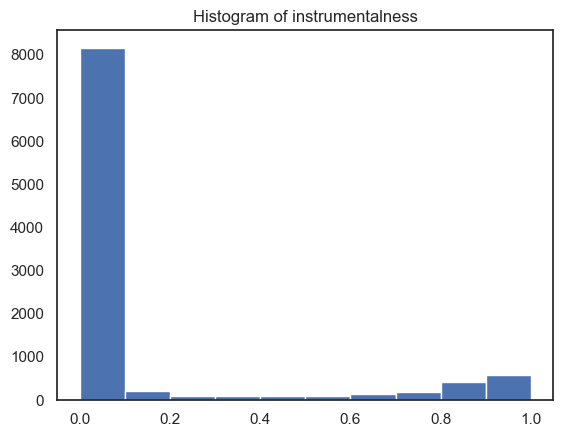

count    10000.000000
mean         0.131246
std          0.296356
min          0.000000
25%          0.000000
50%          0.000013
75%          0.007217
max          1.000000
Name: instrumentalness, dtype: float64


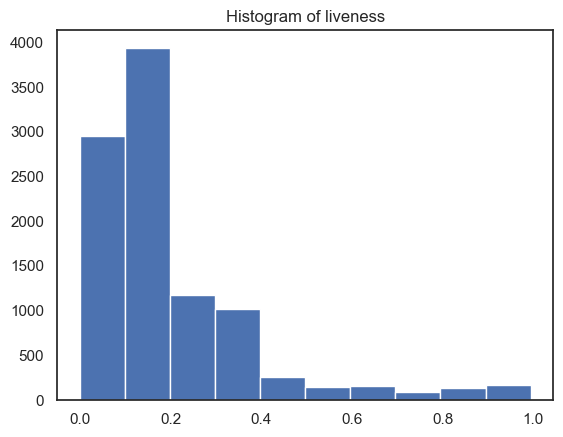

count    10000.000000
mean         0.199009
std          0.181865
min          0.000000
25%          0.092900
50%          0.124000
75%          0.248000
max          0.994000
Name: liveness, dtype: float64


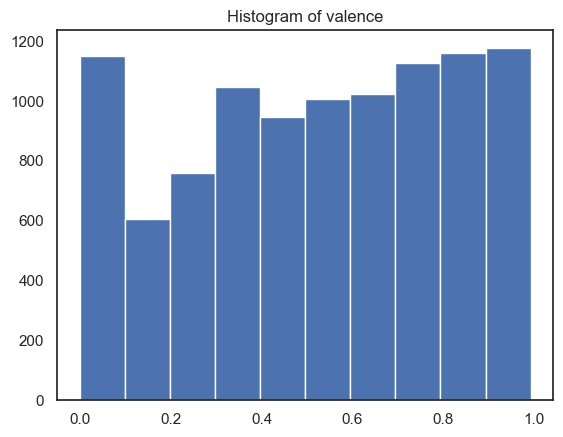

count    10000.000000
mean         0.523668
std          0.292473
min          0.000000
25%          0.295000
50%          0.546000
75%          0.780250
max          0.992000
Name: valence, dtype: float64


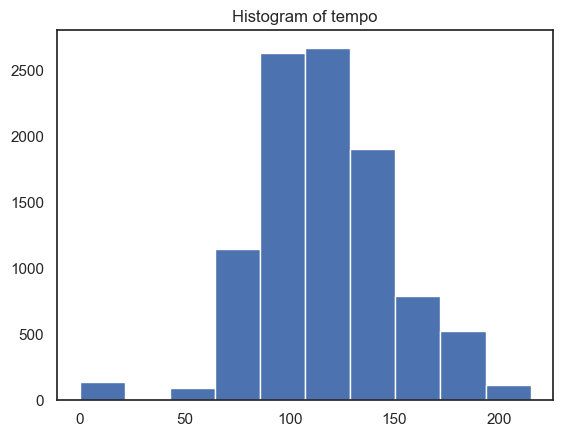

count    10000.000000
mean       117.315240
std         32.695135
min          0.000000
25%         95.030000
50%        116.174500
75%        135.832000
max        214.864000
Name: tempo, dtype: float64


In [214]:
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
categorical_columns = ['track_genre', 'explicit'] # mode
for col in numerical_columns:
    column_data = df[col]
    _, ax = plt.subplots()
    ax.set_title(f'Histogram of {col}')
    
    plt.hist(column_data)
    # plt.savefig(f'plt/{col}.png', format='png')
    plt.show()
    print(column_data.describe())

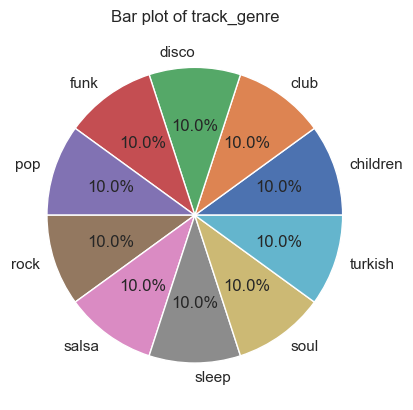

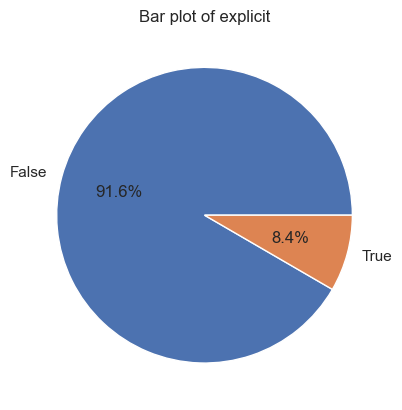

In [215]:
for col in categorical_columns:
    column_data = df[col]
    fig, ax = plt.subplots()
    ax.set_title(f'Bar plot of {col}')
    ax.pie(column_data.value_counts(), labels=column_data.value_counts().index, autopct='%1.1f%%')
    plt.savefig(f'plt/{col}.png', format='png')
    plt.show()

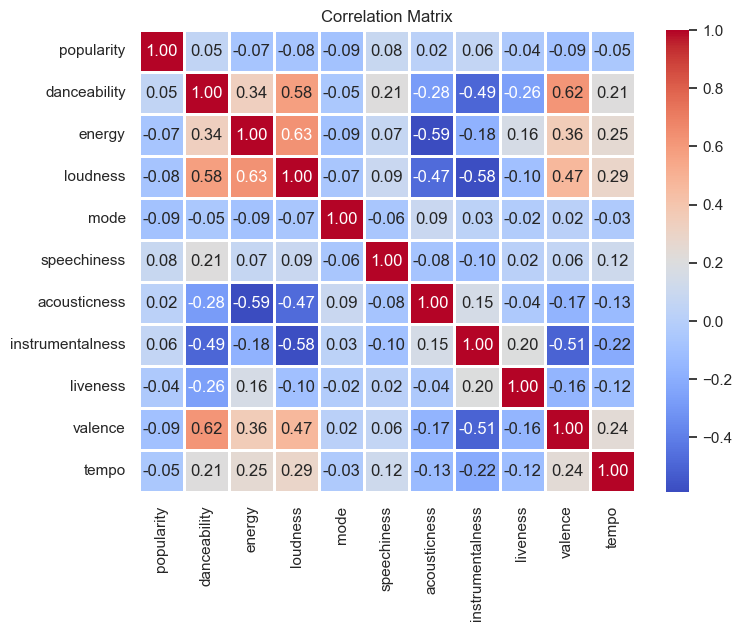

In [216]:
correlation_matrix = df[numerical_columns].corr()

# Use seaborn for a more visually appealing heatmap
sns.set(style="white")

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.8)
plt.title("Correlation Matrix")
plt.savefig('./plt/correlation_matrix.png')
plt.show()

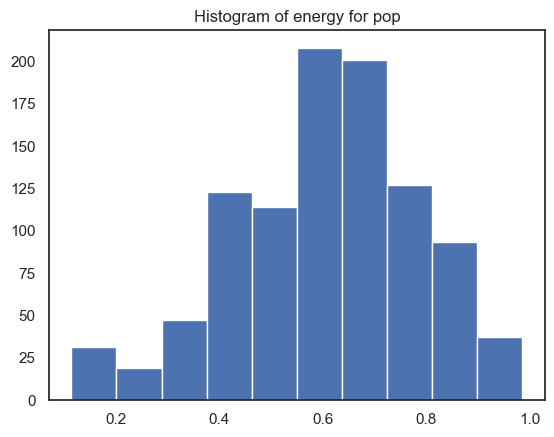

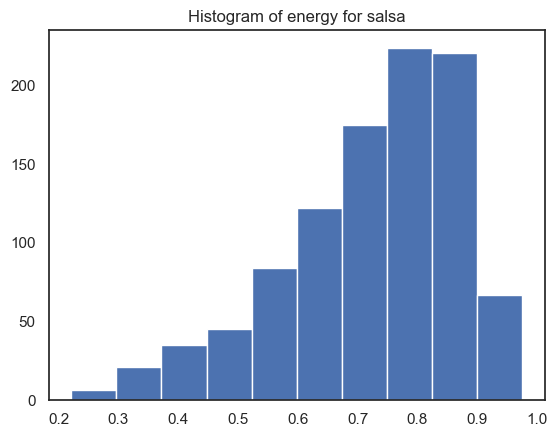

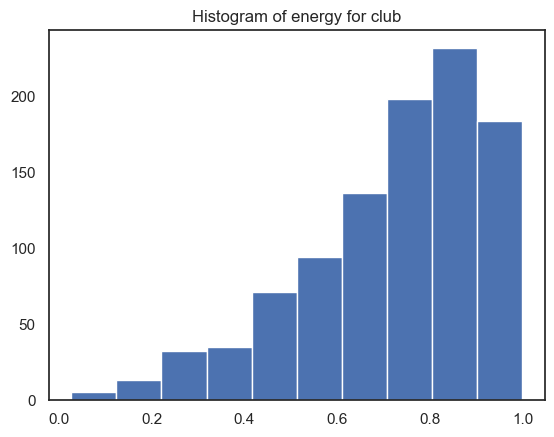

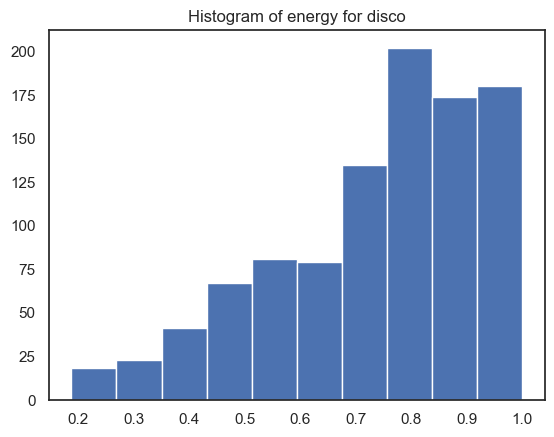

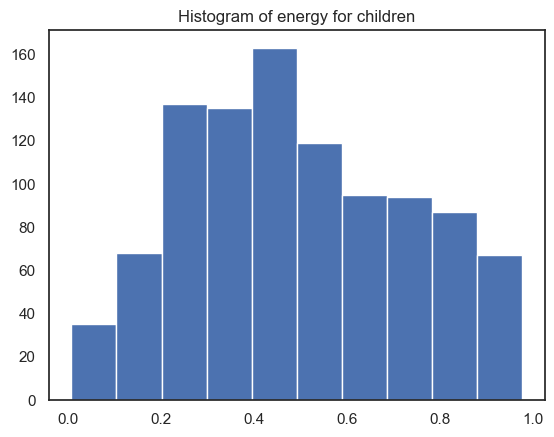

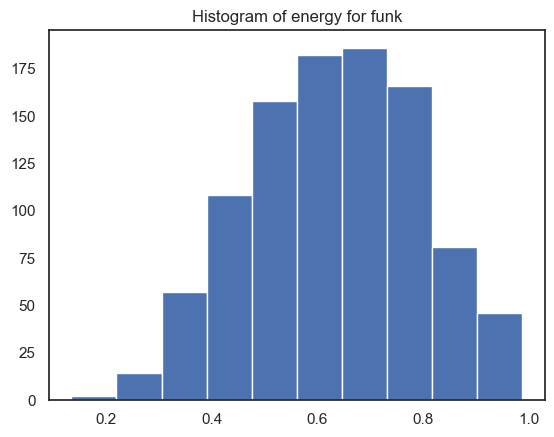

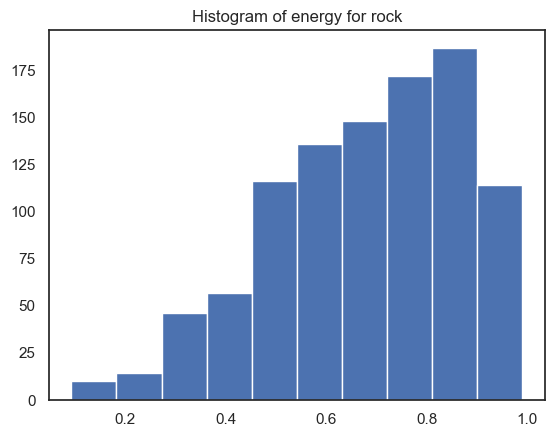

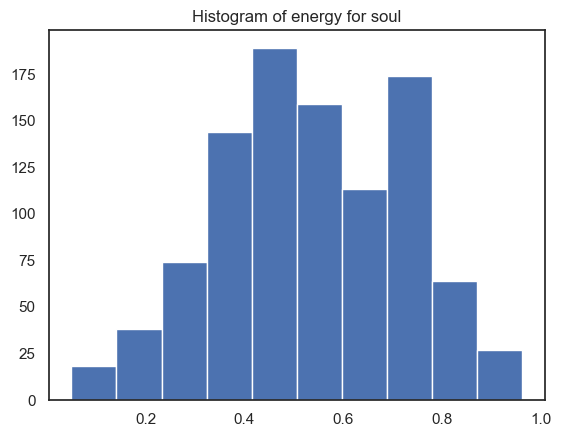

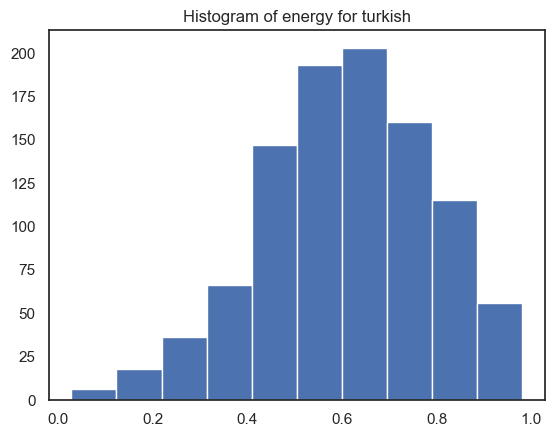

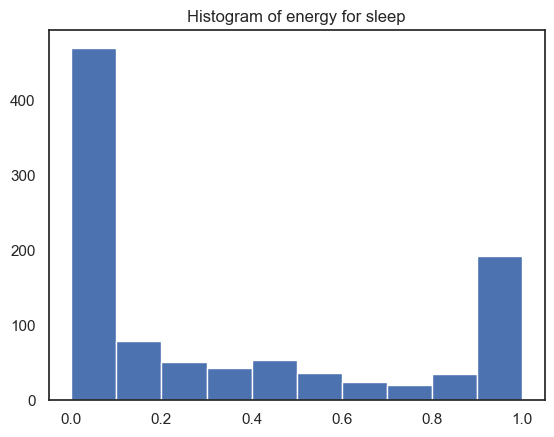

In [217]:
# TODO: Make a graph showing track_genre and numerical column distribution.

for genre in genres:
    genre_df = df[df['track_genre'] == genre]
    for col in ['energy']: 
        column_data = genre_df[col]
        _, ax = plt.subplots()
        ax.set_title(f'Histogram of {col} for {genre}')
        plt.hist(column_data)
        plt.savefig(f'plt/{genre}_{col}.png', format='png')
        plt.show()

# Feature Selection & Engineering

In this section, we will enhance our dataset by employing several feature selection and engineering techniques. 
These methods will help us to refine our features and make them more suitable for our machine learning model. The techniques we will use include:

### Dropping Highly Correlated Columns:
This helps to reduce redundancy in our dataset, as highly correlated variables carry similar information.

### Removing Low Variance Columns: 
Features with low variance are less useful for our model because they contain less information about the variance of our output variable.

### One-Hot Encoding of Categorical Columns: 
This is used to convert categorical data into a format that can be provided to machine learning algorithms to improve prediction results.

### Feature Scaling: 
This technique standardizes the range of our features to ensure that no particular feature dominates others in the model, which could potentially lead to skewed predictions.


### PCA & SVD 
Maybe we can use these when we are adding artists? 

---
**Highly Correlated Columns**: Upon examination, there are no variables in the dataset with high enough correlation to warrant being dropped. While 'energy' and 'acousticness' may show some correlation, we will retain them for now due to their potential predictive power.


**Low Variance Columns**: We will proceed with dropping any constant values and features with low variance, as these do not significantly contribute to the predictive power of our model.

In [218]:
selector = VarianceThreshold(0.015)
print(df[numerical_columns].var())
selector.fit(df[numerical_columns])
dropped_columns = []
for index, col in enumerate(numerical_columns):
    if(not selector.get_support()[index]):
        dropped_columns.append(col)
        numerical_columns.remove(col)

print("Columns to be dropped:", dropped_columns)
df.drop(dropped_columns, axis=1, inplace=True)

popularity           615.424161
danceability           0.041746
energy                 0.059835
loudness              41.758677
mode                   0.233279
speechiness            0.008533
acousticness           0.096231
instrumentalness       0.087827
liveness               0.033075
valence                0.085541
tempo               1068.971827
dtype: float64
Columns to be dropped: ['speechiness']


1) One hot encoding before splitting ``track_genre`` to avoid getting different number of columns in train and test data.
2) We will make a Set of artists and then one hot encode them into our data set. Remember that, a song can have multiple artists.
3) ^ Same will be done for ``album_name`` column.

In [219]:
# One hot encoding before splitting the data to avoid getting different number of columns in train and test data
# one_hot = pd.get_dummies(df, columns=['track_genre'], prefix=['track_genre'])
# df = pd.concat([df, one_hot], axis=1)

# # Add the dummy columns to the list of numerical columns
# new_columns = one_hot.columns.difference(df.columns).tolist()
# numerical_columns.extend(new_columns)
# df.head(3)
# print(df.shape)
# print(df.columns)

We can't one-hot encode the artists & album_name columns because there are too many unique values of them.

In [220]:
# print(df['track_genre'].unique())
# unique_values = set([item for sublist in df['artists'].tolist() for item in sublist])
# print(len(unique_values)) # ~4K
# print(len(df['album_name'].unique())) # ~5K

# exploded_df = df.explode('artists')
# one_hot = pd.get_dummies(exploded_df['artists'])
# one_hot = one_hot.groupby(one_hot.index).sum()
# print('one-hot', one_hot.shape)
# new_columns = one_hot.columns.difference(df.columns).tolist()
# df = df.join(one_hot)
# print('df', df.shape)

# # Add the dummy columns to the list of numerical columns
# print(new_columns)
# numerical_columns.extend(new_columns)
# print('numerical_columns', len(numerical_columns))

Apply MinMaxScalling to our numerical features in order to stop features with high value dominate when trainging the models.

In [221]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Base model: Decision tree
We are going to start with DecisionTreeClassifier as a base model. We will try to compare it the performance of it with other models

- [ ] Try post-pruning the tree

In [222]:
from sklearn.tree import DecisionTreeClassifier

# Split dataset into training set and test set
print(df.shape)
train_data, test_data, train_label, test_label = train_test_split(df[numerical_columns], df['track_genre'], test_size=0.33)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 10]
}

# Grid Search with cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(df[numerical_columns], df['track_genre'])

# Best parameters and best score
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

decision_tree_clf = DecisionTreeClassifier(**grid_search.best_params_) 
# Cross validation
scores_dt = cross_val_score(decision_tree_clf, df[numerical_columns], df['track_genre'], cv=5, scoring='f1_weighted', n_jobs=-1)
print("Cross-validation Scores:")
print("\nMean CV Score:", np.max(scores_dt))
print("\nMean CV Score:", np.mean(scores_dt))
print("Standard Deviation of CV Scores:", np.std(scores_dt))

(10000, 15)
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.5011486776303099
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=5)
Cross-validation Scores:
[0.36645422 0.46900512 0.55086713 0.59324213 0.52159186]
0.5932421330578448

Mean CV Score: 0.5002320919213299
Standard Deviation of CV Scores: 0.07815709320701993


# Model 2: Random Forest

In [223]:
from sklearn.ensemble import RandomForestClassifier

# We did grid search for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'min_samples_split': [2, 5, 10, 25],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2'],
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(df[numerical_columns], df['track_genre'])
print(grid_search.best_params_)
print(grid_search.best_score_)
# Output
# {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
# 0.6638923954269033
# RandomForestClassifier(n_estimators=150, random_state=42)

random_forest_clf = RandomForestClassifier(max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=150)
# Also let's do cross validation
scores_rf = cross_val_score(random_forest_clf, df[numerical_columns], df['track_genre'], cv=5, scoring='f1_weighted')
print("Cross-validation Scores:")
print(scores_rf)
print("\nMean CV Score:", np.mean(scores_rf))
print("\Max CV Score:", np.max(scores_rf))
print("Standard Deviation of CV Scores:", np.std(scores_rf))


{'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.5926841401740482
Cross-validation Scores:
[0.43547042 0.59121492 0.65568892 0.66640167 0.58614661]

Mean CV Score: 0.5869845090295543
Standard Deviation of CV Scores: 0.08246514223148156


# Model 3: Gradient boosting ensemble method

In [224]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 4, 5],  # Maximum depth of the individual trees
    'loss': ['log_loss', 'exponential'],
    "criterion": ["friedman_mse",  "squared_error"]
}

# Create Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(loss='')
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_search.fit(df[numerical_columns], df['track_genre'])

print("Best score", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)
# Best score 0.7331717250574844
# Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150}

# Create Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(**grid_search.best_params_)

# Perform cross-validation
scores_gb = cross_val_score(gb_model, df[numerical_columns], df['track_genre'], cv=5, scoring='f1_weighted',  n_jobs=-1)

# Display the cross-validation scores
print("Cross-validation Scores:")
print(scores_gb)
print("\nMean CV Score:", np.mean(scores_gb))
print("Standard Deviation of CV Scores:", np.std(scores_gb))

/Users/omilod/Desktop/projects/Spotify-ML/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
270 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/omilod/Desktop/projects/Spotify-ML/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/omilod/Desktop/projects/Spotify-ML/env/lib/python3.9/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/omilod/Desktop/projects/Spotify-ML/env/lib/python3.9/site-

Best score 0.578443993787618
Best Parameters: {'criterion': 'squared_error', 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'n_estimators': 100}
Cross-validation Scores:
[0.40656078 0.57113239 0.65389082 0.68271271 0.57513542]

Mean CV Score: 0.5778864247165859
Standard Deviation of CV Scores: 0.09609461914352853


Now let's compare the results of all the models cross-validation scores. 

In [ ]:
plt.plot(scores_dt, label='Decision Tree')
plt.plot(scores_gb, label='Gradient Boosting')
plt.plot(scores_rf, label='Random Forest')

plt.legend()
plt.show()